In [238]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
#Импортируем две выборки - accept и reject 
df_accept=pd.read_csv("/content/drive/MyDrive/5_accept.csv")
df_reject=pd.read_csv("/content/drive/MyDrive/5_reject.csv")

# Исследование данных

Посмотрим на первые 10 значений в обеих выборках 

In [240]:
df_accept.head(10)

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,OTHER,elementary,NaN,60000.0,0.0,0,NaN,NaN,33.347032,3.265753,NaN,NaN,10.671233,4
1,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
2,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
3,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17
4,0,OTHER,elementary,Corporate,102915.0,0.0,1,2.0,1.174485,54.064219,1.458739,0.0,0.0,8.888876,21
5,0,2NDFL,elementary,NaN,97414.0,0.0,0,2.0,-0.595632,32.515068,10.178082,1.0,1.0,3.665753,35
6,0,2NDFL,high,NaN,27697.0,0.0,0,0.0,1.505712,26.873973,3.583562,0.0,0.0,6.572603,39
7,0,OTHER,advanced,Corporate,25448.0,0.0,1,NaN,NaN,55.428962,7.661202,NaN,NaN,9.922854,42
8,0,OTHER,advanced,Corporate,56194.0,0.0,1,0.0,0.443100,30.257534,0.489827,0.0,0.0,8.782177,46
9,0,2NDFL,elementary,NaN,108000.0,0.0,0,0.0,1.187500,34.347945,0.440198,1.0,1.0,11.304110,48


In [241]:
df_reject.head(10)

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,2NDFL,elementary,NaN,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12
1,2NDFL,elementary,NaN,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27
2,2NDFL,advanced,NaN,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33
3,2NDFL,advanced,NaN,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41
4,2NDFL,elementary,NaN,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55
5,OTHER,elementary,Corporate,25680.0,0.0,1,NaN,NaN,23.271233,0.487671,NaN,NaN,3.071233,62
6,OTHER,elementary,Corporate,172783.0,0.0,0,NaN,NaN,24.049315,0.276712,NaN,NaN,4.002740,89
7,OTHER,advanced,Corporate,130500.0,0.0,1,0.0,0.989270,23.516393,0.675552,0.0,0.0,3.390621,90
8,2NDFL,elementary,NaN,NaN,0.0,1,NaN,NaN,22.017164,0.445355,NaN,NaN,1.929493,160
9,OTHER,elementary,Corporate,91657.0,0.0,0,1.0,0.572603,24.317808,0.542466,1.0,1.0,3.704110,169


In [242]:
df_accept.dtypes

target                         int64
INCOME_TYPE                   object
EDUCATION_                    object
CUSTOMER_CATEGORY_            object
income                       float64
DEPENDANT_NUMBER             float64
IS_EMPL                        int64
COUNT_ACTIVE_CREDIT_NO_CC    float64
CNT_MNTH_FROM_LAST_PMNT      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
UID                            int64
dtype: object

In [243]:
#Далее оценим долю 1 по переменной target в датафрейме accept
rate_1 = df_accept['target'][df_accept['target'] == 1].count()/df_accept['target'].count()
rate_1

0.021410579345088162

Видим, что доля 1 очень низка. Оценим в дальнейшем долю без учета выбросов и пропущенных значений

In [244]:
#Найдем основные статистические показатели по выборке accept 
df_accept.describe()

,target,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
count,32554.000000,3.189400e+04,32517.000000,32554.000000,24258.000000,22472.000000,32554.000000,32510.000000,23433.000000,23433.000000,32554.000000,32554.000000
mean,0.021411,6.114778e+04,0.007381,0.393623,0.664152,20.969951,36.485953,4.896833,0.355226,0.419067,7.252232,70027.447748
std,0.144751,7.070286e+04,0.106993,0.488560,0.826820,143.445406,8.208573,5.301854,0.604379,0.682812,3.353438,40584.824840
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-66.559028,25.000187,-4.600000,0.000000,0.000000,-0.019126,4.000000
25%,0.000000,2.702650e+04,0.000000,0.000000,0.000000,0.530399,29.587304,1.213564,0.000000,0.000000,4.978956,34843.500000
50%,0.000000,4.171050e+04,0.000000,0.000000,0.000000,0.926344,34.799745,3.241096,0.000000,0.000000,7.778082,69696.000000
75%,0.000000,7.000000e+04,0.000000,1.000000,1.000000,3.659045,42.309896,6.491882,1.000000,1.000000,9.932154,105050.250000
max,1.000000,3.500010e+06,4.000000,1.000000,8.000000,1365.276703,58.937802,101.192365,6.000000,8.000000,15.616438,140904.000000


In [245]:
#Создадим колонки с категориальными и интервальными переменными:
interval_variables = df_accept.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorial_variables = df_accept.select_dtypes(include=['object']).columns.tolist()
interval_variables.remove('IS_EMPL')
categorial_variables = categorial_variables+['IS_EMPL']

In [246]:
df_accept[categorial_variables]

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL
0,OTHER,elementary,NaN,0
1,2NDFL,elementary,NaN,0
2,OTHER,elementary,Corporate,1
3,OTHER,elementary,VIP,1
4,OTHER,elementary,Corporate,1
...,...,...,...,...
32549,OTHER,elementary,NaN,0
32550,OTHER,advanced,NaN,0
32551,OTHER,advanced,NaN,0
32552,OTHER,elementary,NaN,0


In [247]:
#Проанализируем доли пропущенных значений для интервальных переменных 
a = df_accept[interval_variables].isna().sum()/len(df_accept[interval_variables])
a

target                       0.000000
income                       0.020274
DEPENDANT_NUMBER             0.001137
COUNT_ACTIVE_CREDIT_NO_CC    0.254838
CNT_MNTH_FROM_LAST_PMNT      0.309701
age                          0.000000
experience                   0.001352
inquiry_14_day               0.280181
inquiry_21_day               0.280181
count_mnth_act_passport      0.000000
UID                          0.000000
dtype: float64

In [248]:
#Проанализируем доли пропущенных значений для категориальных переменных
b = df_accept[categorial_variables].isna().sum()/len(df_accept[categorial_variables])
b

INCOME_TYPE           0.000000
EDUCATION_            0.000000
CUSTOMER_CATEGORY_    0.594305
IS_EMPL               0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


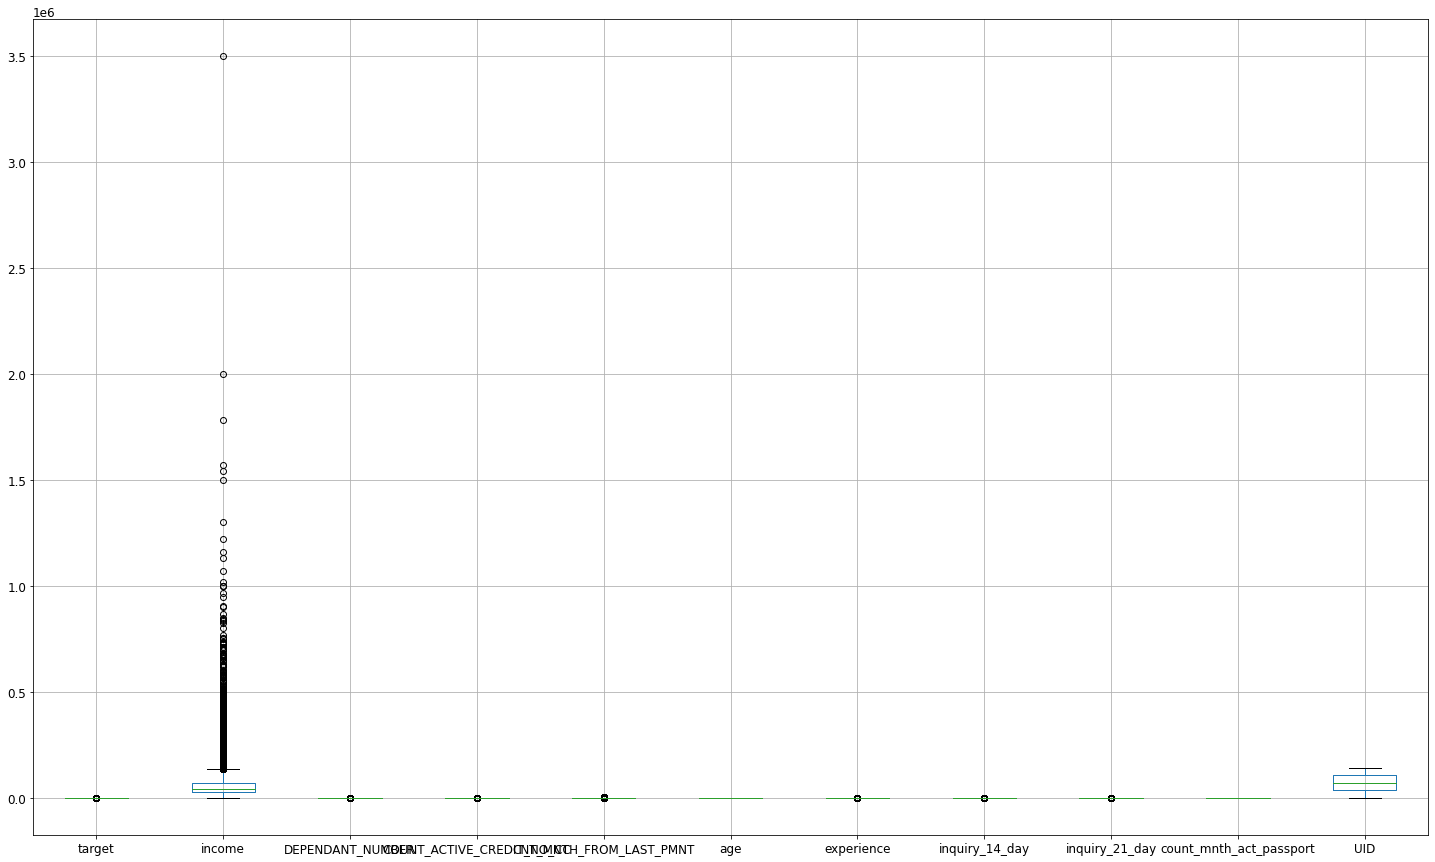

In [249]:
#Проанализируем данные по одобренным заявкам на наличие выбросов (числовые переменные)
df_accept[interval_variables].boxplot(figsize=(25, 15))

In [250]:
#Выбросы есть, по доходу выделяется разброс значений, что объяснимо широкой выборкой клиентов. Удалим отрицательные значения по некоторым переменным + минимальное значение по возрасту: 
df_accept = df_accept[df_accept['CNT_MNTH_FROM_LAST_PMNT'] >= 0]
df_accept = df_accept[df_accept['experience'] >= 0]
df_accept = df_accept[df_accept['count_mnth_act_passport'] >= 0]
df_accept = df_accept[df_accept['age'] != df_accept['age'].min()]

In [251]:
df_accept[categorial_variables]

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL
2,OTHER,elementary,Corporate,1
3,OTHER,elementary,VIP,1
4,OTHER,elementary,Corporate,1
6,2NDFL,high,NaN,0
8,OTHER,advanced,Corporate,1
...,...,...,...,...
32543,OTHER,elementary,NaN,0
32545,OTHER,elementary,NaN,0
32547,OTHER,elementary,Corporate,1
32549,OTHER,elementary,NaN,0


<Figure size 1800x1440 with 0 Axes>

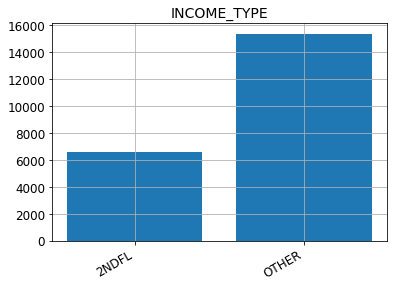

<Figure size 1800x1440 with 0 Axes>

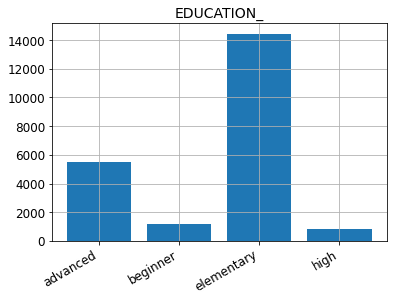

<Figure size 1800x1440 with 0 Axes>

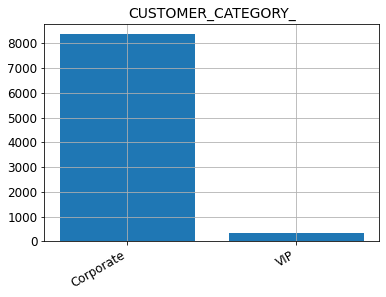

<Figure size 1800x1440 with 0 Axes>

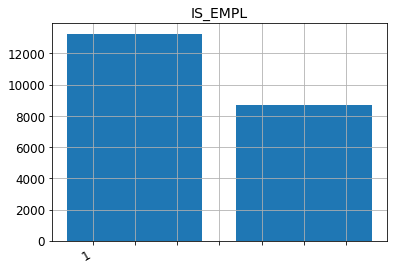

In [252]:
#Категориальные 
import matplotlib.pyplot as plt
for i in categorial_variables: 
    data = df_accept.groupby(i).size().reset_index(name='counts')
    plt.figure(figsize=(25,20))
    fig, ax = plt.subplots()
    ax.grid()
    plt.bar(data[i], data['counts'])
    plt.gca().set_xticklabels(data[i], rotation=30, horizontalalignment= 'right')
    plt.title(i, fontsize=14)
    plt.show()

По значениям частот гистограмм можем вывести значения моды:
'other' - 1500; 'elementary' - 14500; 'corporate' - 8500; '1' - 13000

In [253]:
#Выведем уник.значения 
for j in df_accept[categorial_variables]:
    print(f'{j} : {df_accept[j].unique()}')

INCOME_TYPE : ['OTHER' '2NDFL']
EDUCATION_ : ['elementary' 'high' 'advanced' 'beginner']
CUSTOMER_CATEGORY_ : ['Corporate' 'VIP' nan]
IS_EMPL : [1 0]


Выбросов и аномальных значений по категориальным переменным нет 

# Преобразование переменных на одобренных заявках - рассчет WOE и IV 

In [254]:
#Удалим переменные target из числовых, данные переменные бинарны и подходят для категорий + UID (не несет смысла)
interval_variables.remove('target')
interval_variables.remove('UID')

In [255]:
categorial_variables

['INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_', 'IS_EMPL']

Преобразуем наши переменные по методу WoE. Метод хорош тем, что позволяет решать проблему с пропущенными значениями в выборке. Также зададим формулу для расчета информационного критерия, позволяющего отобрать значимые переменные для дальнейшего построения скоринговой модели 

In [256]:
#зададим функцию подсчета WOE и IV
#По уникальным значениям интервальных переменных выделим датасет, также выделим датасеты при условии равенства целевых переменных 0 и 1 соотвественно
#Подсчитаем процент "плохих" и "хороших" значений 
#Выразим IV и WOE в виде формул 
def calculate_woe_iv(df, feature, target):
    a = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        a.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Events': df[(df[feature] == val) & (df[target] == 0)].count()[feature],
            'Non-events': df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        })
        
    df = pd.DataFrame(a)
    df['rate of Events'] = df['Events'] / df['Events'].sum()
    df['rate of Non-events'] = df['Non-events'] / df['Non-events'].sum()
    df['WoE'] = np.log(df['rate of Events']) - np.log(df['rate of Non-events'])
    df = df.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    df['IV'] = (df['rate of Events'] - df['rate of Non-events']) * df['WoE']
    iv = df['IV'].sum()
    
    dset = df.sort_values(by='WoE')
    
    return dset, iv

*WOE = ln(rate of events) - ln(rate of non-events)*

In [257]:
#Поделим интервальные данные на бины - возьмем 5 частей. Nan заменим на 0-0 для удобства и в числовых, и в категориальных переменных
# делим интервальные переменные на бины
for feature in interval_variables:
    df_accept[feature + '_bin'] = pd.qcut(df_accept[feature], 5, duplicates='drop')
    df_accept[feature + '_bin'] = df_accept[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")
for feature in categorial_variables:
    df_accept[feature] = df_accept[feature].fillna("0-0") 

In [258]:
# разделим на трейн и тест выборку по целевой переменной, импортировав для этого библиотеку "train_test_split"
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_accept, test_size=0.3, random_state=21,stratify=df_accept['target'])

In [259]:
#Посмотрим на train по целевой переменной
train['target'].describe()

count    15364.000000
mean         0.016467
std          0.127267
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

In [260]:
#Посмотрим на test по целевой переменной
test['target'].describe()

count    6585.000000
mean        0.016401
std         0.127021
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [261]:
#Далее подсчитаем IV для каждой интервальной переменной через функцию calculate_woe_iv 
#Зададим значения 'feature' с помощью цикла по интервальным переменным
#Добавим значения 'Value'(значения по каждой переменной) и 'WOE' в обучающую выборку
#Исправим названия переменных, добавив 'WoE'
#Аналогично, добавим переменные в тестовую выборку
#Сделаем заготовку таблицы для подсчета scores

scorecard = pd.DataFrame()
for feature in interval_variables:
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    
    print(feature, 'IV: ',iv)

income IV:  0.02701176468441737
DEPENDANT_NUMBER IV:  6.273952249593879e-05
COUNT_ACTIVE_CREDIT_NO_CC IV:  0.08967291251528388


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


CNT_MNTH_FROM_LAST_PMNT IV:  0.1551554563484174
age IV:  0.01811855743397463
experience IV:  0.11754621126035816
inquiry_14_day IV:  0.11853532369215336
inquiry_21_day IV:  0.1465983435840209
count_mnth_act_passport IV:  0.003011406823282191


In [262]:
# Проделаем аналогичную процедуру для категориальных переменных
for feature in categorial_variables:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    
    print(feature, 'IV:',iv)

INCOME_TYPE IV: 0.03666563702174507
EDUCATION_ IV: 0.0805097797983435
CUSTOMER_CATEGORY_ IV: 0.4779550488651623
IS_EMPL IV: 0.7559903107144694


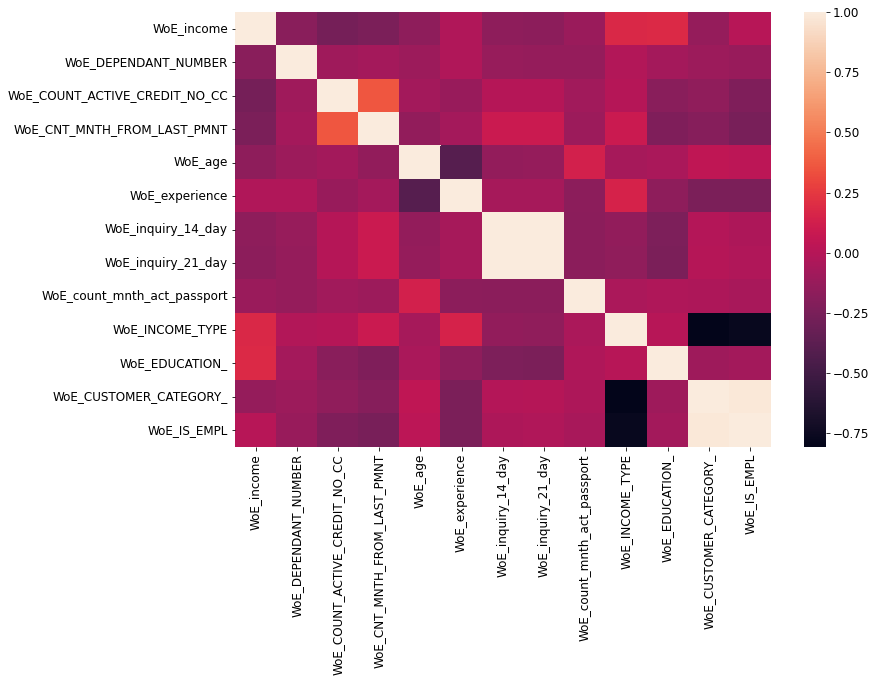

In [263]:
#Исследуем силу корелляционной связи между числовыми переменными в обучающей выборке:
import seaborn as sns
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlations_woe.corr())

Корелляция между WoE_inquiry_14 и WoE_inquiry_21 высокая - одну из переменную исключим в зависимости от значения IV 
Также видим, что наблюдается высокая корелляция между WoE_customer_category и WoE_IS_EML

In [264]:
#Исключаем из обучающей выборки переменные с плохой предсказательной способностью (значение информационного критерия ниже 0,02)
#DEPENDANT_NUMBER, age, count_mnth_act_passport, а также WoE_inquiry_14, так как значение IV ниже, чем у WoE_inquiry_21 (в силу высокого коэфф.корр.)
#По той же причине исключим WoE_customer_category. Целевая переменная не является feature, поэтому также ее исключим 
features = test.columns.tolist()
features.remove('target')
features.remove('UID')
features.remove('WoE_age')
features.remove('WoE_DEPENDANT_NUMBER')
features.remove('WoE_count_mnth_act_passport')
features.remove('WoE_inquiry_14_day')
features.remove('WoE_CUSTOMER_CATEGORY_')

In [265]:
#Получаем обучающуюу выборку с преобразованными значениями 
train[features]

,WoE_income,WoE_COUNT_ACTIVE_CREDIT_NO_CC,WoE_CNT_MNTH_FROM_LAST_PMNT,WoE_experience,WoE_inquiry_21_day,WoE_INCOME_TYPE,WoE_EDUCATION_,WoE_IS_EMPL
0,0.136049,0.142115,0.104795,-0.329586,0.082007,0.321927,0.187883,-0.438637
1,0.179397,0.142115,0.104795,-0.329586,0.082007,0.321927,0.187883,-0.438637
2,-0.059641,0.142115,0.104795,-0.329586,0.082007,0.321927,0.187883,-0.438637
3,-0.059641,-0.635713,-0.061795,-0.329586,0.082007,0.321927,0.187883,-0.438637
4,-0.059641,0.142115,0.835157,-0.329586,0.082007,0.321927,0.187883,-0.438637
...,...,...,...,...,...,...,...,...
15359,0.179397,-0.635713,-0.061795,-0.085767,0.082007,-0.114243,0.410021,1.834133
15360,0.179397,-0.635713,-0.061795,-0.085767,0.082007,-0.114243,0.410021,1.834133
15361,0.179397,-0.635713,0.001217,-0.329586,0.082007,-0.114243,0.410021,1.834133
15362,0.179397,0.142115,0.001217,-0.329586,0.082007,-0.114243,0.410021,1.834133


# Построение логистической регрессии на одобренных заявках 

Далее применим модель машинного обучения - построим лог.регрессию с преобразованными переменными WoE 

In [266]:
#Строим логистическую регрессию, импортировав при этом соответствующую библиотеку
#Задаем независимые переменные - наши отобранные характеристики и зависимую целевую переменную на двух выборках
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train = train[features]
y_train = train['target']
x_test = test[features]
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [267]:
#Далее выведем значение коэффициентов логистической регрессии 
coef = pd.DataFrame()
coef['features'] = x_train.columns
coef['coefficients'] = logreg.coef_.tolist()[0]
coef

,features,coefficients
0,WoE_income,-0.335756
1,WoE_COUNT_ACTIVE_CREDIT_NO_CC,-0.918959
2,WoE_CNT_MNTH_FROM_LAST_PMNT,-0.871005
3,WoE_experience,-1.103035
4,WoE_inquiry_21_day,-0.836941
5,WoE_INCOME_TYPE,-1.892222
6,WoE_EDUCATION_,-1.155176
7,WoE_IS_EMPL,-1.108554


In [268]:
#Предскажем значение зависимой переменной на тестовой выборке 
y_pred = logreg.predict(x_test)

Построим ROC-кривую: проанализируем зависимость чувствительности регрессии от ошибки второго рода. Чем ближе кривая к верхнему левому углу, тем лучше модель

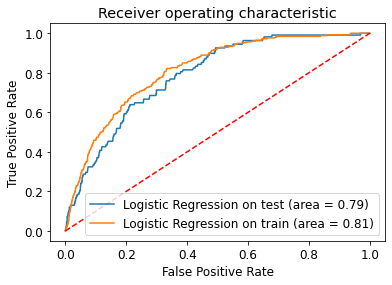

In [269]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=12)


logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(x_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(x_train)[:,1])



plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)


plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Значения на обоих выборках гораздо выше 0.5. Это говорит о том, что исследуемая модель обладает неплохой точностью. Далее посмотрим на значение коэффициента Джини - вычтем из удвоенного значения площадь под ROC-кривой 1 и на F1 меру с помощью специальной библиотеки 

In [270]:
#Подсчитаем значения GINI и F1 меры 
from sklearn.metrics import f1_score
print('GINI:', 2 * roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]) - 1) 
print('F1 метрика:', f1_score(y_test, y_pred))

GINI: 0.5718882770372657
F1 метрика: 0.0


# Анализ Reject Inference 

In [271]:
#Найдем cut-off точку - порог деления клиентов по целевой переменной на "хороших" и "плохих"
gmeans = np.sqrt(tpr_train + (1-fpr_train))
ix = np.argmax(np.sqrt(gmeans))
cutoff = thresholds[ix]
print(cutoff)

0.004959741584000167


In [272]:
#Присвоим бинарные значения вероятностям по условию отношения к значению cut-off точки 
predictions_1 = np.where(logreg.predict_proba(x_test)[:,1] > cutoff, 1, 0)
x_test['predictions_1'] = predictions_1
x_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,WoE_income,WoE_COUNT_ACTIVE_CREDIT_NO_CC,WoE_CNT_MNTH_FROM_LAST_PMNT,WoE_experience,WoE_inquiry_21_day,WoE_INCOME_TYPE,WoE_EDUCATION_,WoE_IS_EMPL,predictions_1
0,-0.187987,0.142115,-0.474875,0.594325,0.082007,0.321927,0.187883,-0.438637,1
1,-0.187987,0.142115,0.104795,0.594325,0.082007,0.321927,0.187883,-0.438637,1
2,-0.083803,0.142115,0.104795,0.594325,0.082007,0.321927,0.187883,-0.438637,0
3,-0.083803,0.142115,-0.061795,0.594325,0.082007,0.321927,0.187883,-0.438637,1
4,0.179397,0.142115,0.835157,0.594325,0.082007,0.321927,0.187883,-0.438637,0
...,...,...,...,...,...,...,...,...,...
6580,0.179397,0.142115,-0.474875,-0.247858,0.082007,-0.114243,0.410021,1.834133,0
6581,0.179397,0.142115,-0.474875,-0.085767,0.082007,-0.114243,0.410021,1.834133,0
6582,0.179397,0.142115,-0.474875,-0.329586,0.082007,-0.114243,0.410021,1.834133,0
6583,0.179397,0.142115,0.835157,-0.329586,0.082007,-0.114243,-0.336459,1.834133,0


Проведем калибровку: рассчитаем баллы 

Score_i =  (βi × WoE_i + α/n) × Factor + Offset/n

Factor = pdo/ln(2)

Offset = Target Score — (Factor × ln(Target Odds))

a -  константа модели;

n - количество переменных (8)

pdo = 20

targets odds = 50

Target Score = 600





In [273]:
#Подсчитаем баллы по каждому интервалу в соотвествии с формулами выше
#Зададим значения переменных, найдем константу
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(coef, how='inner', on='features') #добавим коэф регрессии
scorecard = scorecard.drop(columns = 'features')
a = logreg.intercept_
pdo = 20 
Target_Odds = 50 
Target_Score = 600
Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
scorecard['score'] = (-1)*(scorecard['coefficients']*scorecard['WoE'] + a/8)*Factor + Offset/8
scorecard

,feature,Value,WoE,coefficients,score
0,income,"(37480.0, 52437.6]",-0.187987,-0.335756,73.699222
1,income,"(52437.6, 85230.0]",-0.083803,-0.335756,74.708542
2,income,"(-0.001, 25545.0]",-0.059641,-0.335756,74.942624
3,income,"(25545.0, 37480.0]",0.136049,-0.335756,76.838442
4,income,"(85230.0, 3500010.0]",0.179397,-0.335756,77.258389
5,income,0-0,0.692132,-0.335756,82.225695
6,COUNT_ACTIVE_CREDIT_NO_CC,"(1.0, 8.0]",-0.635713,-0.918959,58.664135
7,COUNT_ACTIVE_CREDIT_NO_CC,"(-0.001, 1.0]",0.142115,-0.918959,79.288669
8,CNT_MNTH_FROM_LAST_PMNT,"(0.476, 0.767]",-0.474875,-0.871005,63.585916
9,CNT_MNTH_FROM_LAST_PMNT,"(0.767, 1.153]",-0.061795,-0.871005,73.967390


Доля отказанных заявок - меньше половины. Далее, полученные баллы соотнесем с переменными по отказанным заявкам в зависимости от их значений с помощью условных операторов. Как автоматизировать такое не знаю :(

In [274]:
#Для интервальных переменных
income_score = []
for income in df_reject['income']:
    if income <= 25542.8:
        income_score.append(75.036229)
    elif 25542.8 < income  and income <= 37473.6:
        income_score.append(76.709048)
    elif 37473.6 < income  and income <= 52433.2:
        income_score.append(73.775231)
    elif 52433.2 < income  and income <= 85229.0: 
        income_score.append(74.796063)
    elif 85229.0 < income:   
        income_score.append(77.258389)
    else: 
        income_score.append(81.694124)

COUNT_ACTIVE_CREDIT_NO_CC_score = []
for count_active in df_reject['COUNT_ACTIVE_CREDIT_NO_CC']:
    if income <= 1.0:
        COUNT_ACTIVE_CREDIT_NO_CC_score.append(79.324942)
    else: 
        COUNT_ACTIVE_CREDIT_NO_CC_score.append(58.490230)

CNT_MNTH_FROM_LAST_PMNT_score = []
for cnt_mnth in df_reject['CNT_MNTH_FROM_LAST_PMNT']:
    if cnt_mnth <= 0.476:
        CNT_MNTH_FROM_LAST_PMNT_score.append(75.481502)
    elif 0.476 < cnt_mnth  and cnt_mnth <= 0.767:
        CNT_MNTH_FROM_LAST_PMNT_score.append(63.539241)
    elif 0.767 < cnt_mnth  and cnt_mnth <= 1.153:
        CNT_MNTH_FROM_LAST_PMNT_score.append(74.117138)
    elif 1.153 < cnt_mnth  and cnt_mnth <= 6.819: 
        CNT_MNTH_FROM_LAST_PMNT_score.append(74.796063)
    else: 
        CNT_MNTH_FROM_LAST_PMNT_score.append(78.277415)

experience_score = []
for experience in df_reject['experience']:
    if experience <= 1.052:
        experience_score.append(65.030301)
    elif 1.052 < experience  and experience <= 2.529:
        experience_score.append(67.704261)
    elif 2.529 < experience  and experience <= 4.684:
        experience_score.append(72.671589)
    elif 4.684 < experience  and experience <= 7.904: 
        experience_score.append(87.313681)
    else: 
        experience_score.append(94.527426)

inquiry_21_day_score = []
for inquiry_21_day in df_reject['inquiry_21_day']:
    if income <= 1.0:
        inquiry_21_day_score.append(51.187487)
    elif 1.0 < income  and income <= 7.0:
        inquiry_21_day_score.append(77.504479)
    else: 
        inquiry_21_day_score.append(122.216565)

In [275]:
#Для категориальных переменных 
INCOME_TYPE_score = []
for income_type in df_reject['INCOME_TYPE']:
    if income_type == 'OTHER':
        INCOME_TYPE_score.append(69.282981)
    else: 
        INCOME_TYPE_score.append(93.096966)

EDUCATION_score = []
for ed in df_reject['EDUCATION_']:
    if ed == 'high':
        EDUCATION_score.append(55.566840)
    elif ed == 'advanced':
        EDUCATION_score.append(64.305802)
    elif ed == 'elementary':
        EDUCATION_score.append(81.782819)
    else: 
        EDUCATION_score.append(89.186963)

IS_EMPL_score = []
for emp in df_reject['IS_EMPL']:
    if emp == 0:
        IS_EMPL_score.append(61.490112)
    elif emp == 1:
        IS_EMPL_score.append(134.187182)

In [276]:
df_reject['income_score'] = income_score
df_reject['COUNT_ACTIVE_CREDIT_NO_CC_score'] = COUNT_ACTIVE_CREDIT_NO_CC_score
df_reject['CNT_MNTH_FROM_LAST_PMNT_score'] = CNT_MNTH_FROM_LAST_PMNT_score
df_reject['experience_score'] = experience_score
df_reject['inquiry_21_day_score'] = inquiry_21_day_score
df_reject['INCOME_TYPE_score'] = INCOME_TYPE_score
df_reject['EDUCATION_score'] = EDUCATION_score
df_reject['IS_EMPL_score'] = IS_EMPL_score

In [277]:
#Выведем суммарные баллы 
df_reject["score"] = df_reject['income_score'] + df_reject['COUNT_ACTIVE_CREDIT_NO_CC_score'] + df_reject['CNT_MNTH_FROM_LAST_PMNT_score'] + df_reject['experience_score'] + df_reject['inquiry_21_day_score'] + df_reject['INCOME_TYPE_score'] + df_reject['EDUCATION_score'] + df_reject['IS_EMPL_score'] 

In [278]:
#Преобразованная таблица
df_reject

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,...,UID,income_score,COUNT_ACTIVE_CREDIT_NO_CC_score,CNT_MNTH_FROM_LAST_PMNT_score,experience_score,inquiry_21_day_score,INCOME_TYPE_score,EDUCATION_score,IS_EMPL_score,score
0,2NDFL,elementary,NaN,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,...,12,76.709048,58.49023,74.796063,72.671589,122.216565,93.096966,81.782819,61.490112,641.253392
1,2NDFL,elementary,NaN,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,...,27,76.709048,58.49023,63.539241,72.671589,122.216565,93.096966,81.782819,61.490112,629.996570
2,2NDFL,advanced,NaN,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,...,33,75.036229,58.49023,74.796063,65.030301,122.216565,93.096966,64.305802,61.490112,614.462268
3,2NDFL,advanced,NaN,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,...,41,76.709048,58.49023,63.539241,65.030301,122.216565,93.096966,64.305802,61.490112,604.878265
4,2NDFL,elementary,NaN,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,...,55,73.775231,58.49023,78.277415,67.704261,122.216565,93.096966,81.782819,61.490112,636.833599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,NaN,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,...,140863,75.036229,58.49023,78.277415,67.704261,122.216565,93.096966,64.305802,61.490112,620.617580
10689,OTHER,elementary,NaN,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,...,140864,75.036229,58.49023,74.796063,65.030301,122.216565,69.282981,81.782819,61.490112,608.125300
10690,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,...,140869,75.036229,58.49023,63.539241,65.030301,122.216565,69.282981,81.782819,134.187182,669.565548
10691,OTHER,elementary,NaN,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,...,140885,75.036229,58.49023,78.277415,65.030301,122.216565,69.282981,81.782819,61.490112,611.606652


In [279]:
#Доля неодобренных заявок 
len(df_reject)/(len(df_accept)+len(df_reject))

0.3275840941118804

In [280]:
#Посмотрим на статистические показатели колонки суммарных баллов 
df_reject['score'].describe()

count    10693.000000
mean       654.505870
std         32.211415
min        569.391501
25%        631.939285
50%        659.638609
75%        683.496330
max        734.263069
Name: score, dtype: float64

Возьмем в качестве границы определения дефлота клиентов, у которых балл выше среднего - 654, вероятнее всего у таких клиентов случится дефолт

In [281]:
#Установим целевую переменную 
target = []
for score in df_reject["score"]:
    if score > 654:
        target.append(1)
    else:
        target.append(0)
df_reject["target"] = target

In [282]:
#Соединим две выборки 
combo = pd.concat([df_accept, df_reject])
combo = combo.iloc[:, :10]
combo

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age
2,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781
3,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073
4,0,OTHER,elementary,Corporate,102915.0,0.0,1,2.0,1.174485,54.064219
6,0,2NDFL,high,0-0,27697.0,0.0,0,0.0,1.505712,26.873973
8,0,OTHER,advanced,Corporate,56194.0,0.0,1,0.0,0.443100,30.257534
...,...,...,...,...,...,...,...,...,...,...
10688,0,2NDFL,advanced,NaN,24311.0,0.0,0,NaN,NaN,23.456284
10689,0,OTHER,elementary,NaN,21400.0,0.0,0,0.0,1.271550,24.040984
10690,1,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623
10691,0,OTHER,elementary,NaN,21750.0,0.0,0,NaN,NaN,23.218579


# Расчеты на объединенной выборке 

In [283]:
#Посмотрим на статистические показатели 
combo.describe()

,target,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age
count,32642.000000,3.158900e+04,32634.000000,32642.000000,28234.000000,27175.000000,32642.000000
mean,0.186937,5.480875e+04,0.005792,0.443845,0.671814,25.518723,32.571567
std,0.389867,6.511748e+04,0.091616,0.496844,0.812780,164.750505,8.953321
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-31.072849,0.002732
25%,0.000000,2.500000e+04,0.000000,0.000000,0.000000,0.537679,24.603825
50%,0.000000,3.784000e+04,0.000000,0.000000,1.000000,0.928719,30.026514
75%,0.000000,6.000000e+04,0.000000,1.000000,1.000000,3.339964,38.636678
max,1.000000,3.500010e+06,4.000000,1.000000,8.000000,1365.276703,58.937802


In [284]:
#Есть аномальные значения - минимум по предпоследней переменной и по возрасту (младененц не может в банке обслуживаться)
combo = combo[combo['age'] != combo['age'].min()]
combo = combo[combo['CNT_MNTH_FROM_LAST_PMNT'] >= 0]

In [285]:
combo.dtypes

target                         int64
INCOME_TYPE                   object
EDUCATION_                    object
CUSTOMER_CATEGORY_            object
income                       float64
DEPENDANT_NUMBER             float64
IS_EMPL                        int64
COUNT_ACTIVE_CREDIT_NO_CC    float64
CNT_MNTH_FROM_LAST_PMNT      float64
age                          float64
dtype: object

In [286]:
#Далее оценим долю 1 по переменной target в датафрейме combo
rate_2 = combo['target'][combo['target'] == 1].count()/combo['target'].count()
rate_2

0.11512707631978099

Заметим, что доля 1 выше, чем в первой модели 

In [287]:
#Создадим колонки с категориальными и интервальными переменными:
interval_variables_1 = combo.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorial_variables_1 = combo.select_dtypes(include=['object']).columns.tolist()
interval_variables_1.remove('IS_EMPL')
categorial_variables_1 = categorial_variables_1+['IS_EMPL']

In [288]:
#Проанализируем доли пропущенных значений для интервальных переменных 
combo[interval_variables_1].isna().sum()/len(combo[interval_variables_1])

target                       0.000000
income                       0.032407
DEPENDANT_NUMBER             0.000222
COUNT_ACTIVE_CREDIT_NO_CC    0.000000
CNT_MNTH_FROM_LAST_PMNT      0.000000
age                          0.000000
dtype: float64

<Figure size 1800x1440 with 0 Axes>

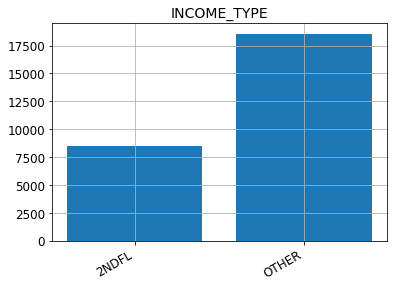

<Figure size 1800x1440 with 0 Axes>

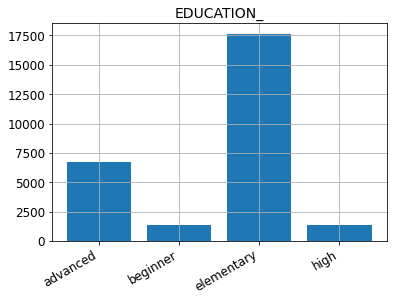

<Figure size 1800x1440 with 0 Axes>

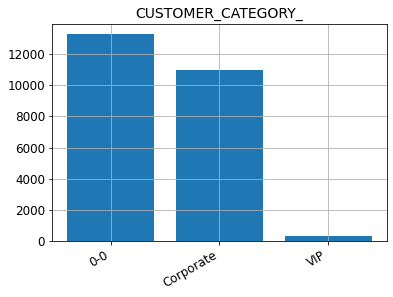

<Figure size 1800x1440 with 0 Axes>

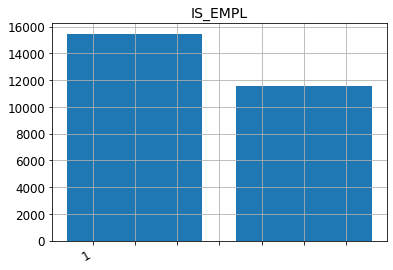

In [289]:
#Категориальные 
import matplotlib.pyplot as plt
for i in categorial_variables_1: 
    data = combo.groupby(i).size().reset_index(name='counts')
    plt.figure(figsize=(25,20))
    fig, ax = plt.subplots()
    ax.grid()
    plt.bar(data[i], data['counts'])
    plt.gca().set_xticklabels(data[i], rotation=30, horizontalalignment= 'right')
    plt.title(i, fontsize=14)
    plt.show()

По частотам распределение данных более равномерно, моды те же, что для первой части 

In [290]:
#Удалим переменные target из числовых, данные переменные бинарны и подходят для категорий
interval_variables_1.remove('target')

In [291]:
#зададим функцию подсчета WOE и IV
#По уникальным значениям интервальных переменных выделим датасет, также выделим датасеты при условии равенства целевых переменных 0 и 1 соотвественно
#Подсчитаем процент "плохих" и "хороших" значений 
#Выразим IV и WOE в виде формул 
def calculate_woe_iv(df0, feature, target):
    a = []
    for i in range(df0[feature].nunique()):
        val = list(df0[feature].unique())[i]
        a.append({
            'Value': val,
            'All': df0[df0[feature] == val].count()[feature],
            'Events': df0[(df0[feature] == val) & (df0[target] == 0)].count()[feature],
            'Non-events': df0[(df0[feature] == val) & (df0[target] == 1)].count()[feature]
        })
        
    df0 = pd.DataFrame(a)
    df0['rate of Events'] = df0['Events'] / df0['Events'].sum()
    df0['rate of Non-events'] = df0['Non-events'] / df0['Non-events'].sum()
    df0['WoE'] = np.log(df0['rate of Events']) - np.log(df0['rate of Non-events'])
    df0 = df0.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    df0['IV'] = (df0['rate of Events'] - df0['rate of Non-events']) * df0['WoE']
    iv = df0['IV'].sum()
    
    dset0 = df0.sort_values(by='WoE')
    
    return dset0, iv

In [292]:
#Поделим интервальные данные на бины - возьмем 5 частей. Nan заменим на 0-0 для удобства и в числовых, и в категориальных переменных
# делим интервальные переменные на бины
for feature in interval_variables_1:
    combo[feature + '_bin'] = pd.qcut(combo[feature], 5, duplicates='drop')
    combo[feature + '_bin'] = combo[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")
for feature in categorial_variables_1:
    combo[feature] = combo[feature].fillna("0-0") 

In [293]:
train, test = train_test_split(combo, test_size=0.3, random_state=21,stratify=combo['target'])

In [294]:
#Далее подсчитаем IV для каждой интервальной переменной через функцию calculate_woe_iv 
#Зададим значения 'feature' с помощью цикла по интервальным переменным
#Добавим значения 'Value'(значения по каждой переменной) и 'WOE' в обучающую выборку
#Исправим названия переменных, добавив 'WoE'
#Аналогично, добавим переменные в тестовую выборку
#Сделаем заготовку таблицы для подсчета scores

scorecard_1 = pd.DataFrame()
for feature in interval_variables_1:
    df0, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df0['feature'] = feature
    train = train.merge(df0[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    
    test = test.merge(df0[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard_1 = pd.concat([scorecard_1, df0[['feature', 'Value', 'WoE']]])
    
    print(feature, 'IV: ',iv)

income IV:  0.39645212920030376
DEPENDANT_NUMBER IV:  0.0016298918472142983
COUNT_ACTIVE_CREDIT_NO_CC IV:  4.204709667044962e-05
CNT_MNTH_FROM_LAST_PMNT IV:  0.05599672380223868
age IV:  3.14956420516611


In [295]:
# Проделаем аналогичную процедуру для категориальных переменных
for feature in categorial_variables:
    df0, iv = calculate_woe_iv(train, feature , 'target')
    df0['feature'] = feature
    train = train.merge(df0[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    
    test = test.merge(df0[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard_1 = pd.concat([scorecard_1, df0[['feature', 'Value', 'WoE']]])
    
    print(feature, 'IV:',iv)

INCOME_TYPE IV: 0.15358908810486185
EDUCATION_ IV: 0.040946346806944665
CUSTOMER_CATEGORY_ IV: 0.7589664620515642
IS_EMPL IV: 1.3168448053214654


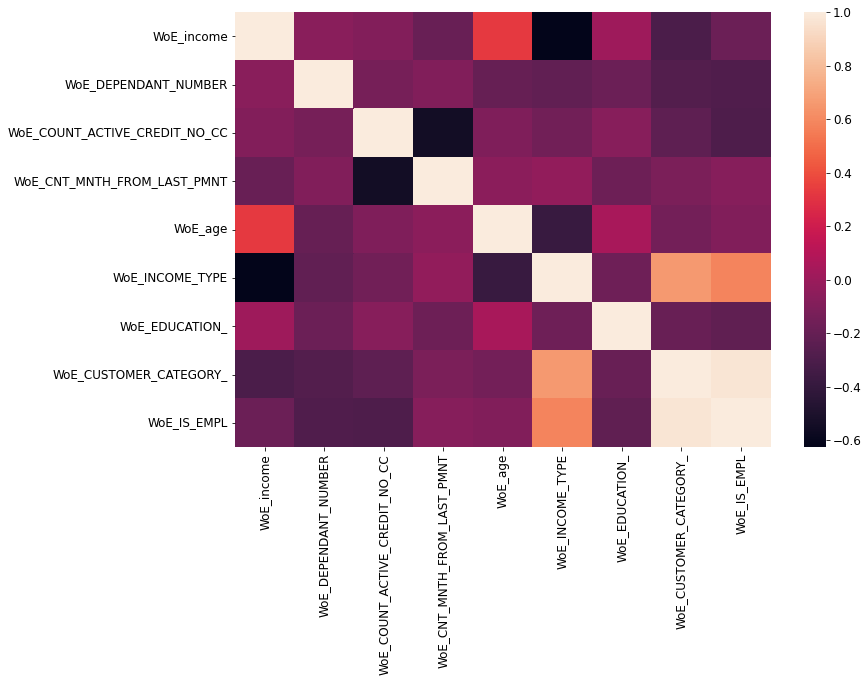

In [296]:
#Исследуем силу корелляционной связи между числовыми переменными в обучающей выборке:
correlations_woe_1 = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlations_woe_1.corr())

Сильных корелляционных связей нет - ничего не исключаем 

In [297]:
#Исключаем из обучающей выборки переменные с плохой предсказательной способностью (значение информационного критерия ниже 0,02)
features = test.columns.tolist()
features.remove('target')
features.remove('WoE_COUNT_ACTIVE_CREDIT_NO_CC')
features.remove('WoE_DEPENDANT_NUMBER')


# Построение логистической регрессии на объединенной выборке 

In [298]:
#Строим логистическую регрессию, импортировав при этом соответствующую библиотеку
#Задаем независимые переменные - наши отобранные характеристики и зависимую целевую переменную на двух выборках
x_train0 = train[features]
y_train0 = train['target']
x_test0 = test[features]
y_test0 = test['target']

logreg = LogisticRegression()
logreg.fit(x_train0, y_train0)

LogisticRegression()

In [299]:
#Далее выведем значение коэффициентов логистической регрессии 
coef0 = pd.DataFrame()
coef0['features'] = x_train0.columns
coef0['coefficients'] = logreg.coef_.tolist()[0]
coef0

,features,coefficients
0,WoE_income,-0.299138
1,WoE_CNT_MNTH_FROM_LAST_PMNT,-0.245945
2,WoE_age,-1.099951
3,WoE_INCOME_TYPE,-1.148161
4,WoE_EDUCATION_,0.703642
5,WoE_CUSTOMER_CATEGORY_,0.315404
6,WoE_IS_EMPL,-1.213071


In [300]:
#Предскажем значение зависимой переменной на тестовой выборке 
y_pred0 = logreg.predict(x_test0)

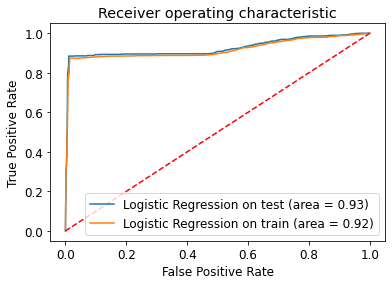

In [301]:
#ROC-кривая 
plt.rc("font", size=12)


logit_roc_auc = roc_auc_score(y_test0, logreg.predict_proba(x_test0)[:,1])
fpr, tpr, thresholds = roc_curve(y_test0, logreg.predict_proba(x_test0)[:,1])



logit_roc_auc_train = roc_auc_score(y_train0, logreg.predict_proba(x_train0)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train0, logreg.predict_proba(x_train0)[:,1])



plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)


plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 В сравнении с первой моделью значения на обоих выборках ближе к 1. Это говорит о том, что исследуемая модель обладает очень высокой точностью. Далее посмотрим на значение коэффициента Джини - вычтем из удвоенного значения площадь под ROC-кривой 1 и на F1 меру с помощью специальной библиотеки 

In [302]:
#Подсчитаем значения GINI и F1 меры 
print('GINI_1:', 2 * roc_auc_score(y_test0, logreg.predict_proba(x_test0)[:,1]) - 1) 
print('F1 метрика_1:', f1_score(y_test0, y_pred0))

GINI_1: 0.8514837407107678
F1 метрика_1: 0.8968903436988545


Во второй модели значения показателей выше - вторая модель лучше, рекомендую ее внедрять в продуктовую среду